<a href="https://colab.research.google.com/github/harsh16kh/nomura_challenge/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/IPL_train.csv')
print(f"Dataset successfully Imported of Shape : {data.shape}")

Dataset successfully Imported of Shape : (36814, 19)


In [ ]:
data.head()

,match_id,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
data.describe()

,match_id,over,ball,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,36814.000000,36814.000000,36814.000000,36814.000000,36814.00000,36814.000000,36814.000000,36814.0,36814.000000,36814.000000,36814.000000
mean,318.342804,10.409002,3.621801,0.036970,0.00527,0.020807,0.004455,0.0,1.243331,0.067501,1.310833
std,183.535474,5.763502,1.806502,0.260111,0.12100,0.189076,0.069001,0.0,1.608069,0.346555,1.596387
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,159.000000,5.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,327.000000,10.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,483.000000,15.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,636.000000,20.000000,9.000000,5.000000,4.00000,5.000000,2.000000,0.0,6.000000,5.000000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36814 entries, 0 to 36813
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          36814 non-null  int64 
 1   batting_team      36814 non-null  object
 2   bowling_team      36814 non-null  object
 3   over              36814 non-null  int64 
 4   ball              36814 non-null  int64 
 5   batsman           36814 non-null  object
 6   non_striker       36814 non-null  object
 7   bowler            36814 non-null  object
 8   wide_runs         36814 non-null  int64 
 9   bye_runs          36814 non-null  int64 
 10  legbye_runs       36814 non-null  int64 
 11  noball_runs       36814 non-null  int64 
 12  penalty_runs      36814 non-null  int64 
 13  batsman_runs      36814 non-null  int64 
 14  extra_runs        36814 non-null  int64 
 15  total_runs        36814 non-null  int64 
 16  player_dismissed  1800 non-null   object
 17  dismissal_ki

In [ ]:
data.nunique()

match_id            300
batting_team         14
bowling_team         14
over                 20
ball                  9
batsman             348
non_striker         342
bowler              285
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           3
penalty_runs          1
batsman_runs          7
extra_runs            6
total_runs            8
player_dismissed    312
dismissal_kind        8
fielder             280
dtype: int64

In [ ]:
data.dtypes

match_id             int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [ ]:
data.columns

Index(['match_id', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'wide_runs', 'bye_runs', 'legbye_runs',
       'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs',
       'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
total_run_per_match = data.groupby('match_id').agg({'total_runs': sum})
total_run_per_match.rename(columns = {'total_runs':'total'}, inplace=True)

In [ ]:
data['total_csum'] = data.groupby(['match_id'])['total_runs'].cumsum()

In [ ]:
data

,match_id,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,total_csum
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN,NaN,4
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0,0,0,0,0,2,2,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36809,636,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,6,0,6,NaN,NaN,NaN,194
36810,636,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,6,0,6,NaN,NaN,NaN,200
36811,636,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,1,0,1,NaN,NaN,NaN,201
36812,636,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,B Kumar,BCJ Cutting,SR Watson,0,0,0,0,0,1,0,1,NaN,NaN,NaN,202


In [ ]:
data.set_index('match_id', inplace=True)

In [ ]:
data = data.join(total_run_per_match)

In [ ]:
data

,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,total_csum,total
match_id,,,,,,,,,,,,,,,,,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN,NaN,4,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0,0,0,0,0,2,2,NaN,NaN,NaN,6,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,6,0,6,NaN,NaN,NaN,194,208
636,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,6,0,6,NaN,NaN,NaN,200,208
636,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,B Kumar,SR Watson,0,0,0,0,0,1,0,1,NaN,NaN,NaN,201,208


In [ ]:
data['total_csum']

match_id
1        0
1        0
1        4
1        4
1        6
      ... 
636    194
636    200
636    201
636    202
636    208
Name: total_csum, Length: 36814, dtype: int64

In [ ]:
#data.reset_index(level=0, inplace=True)
#data

In [ ]:
irrelevant = ['batsman', 'bowler', 'batsman', 'non_striker', 'fielder', 'dismissal_kind', 'player_dismissed', 'batsman_runs', 'penalty_runs', 'noball_runs', 'legbye_runs', 'bye_runs', 'wide_runs']
print(f'Before Removing Irrelevant Columns : {data.shape}')
data = data.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {data.shape}')
data.head()

Before Removing Irrelevant Columns : (36814, 20)
After Removing Irrelevant Columns : (36814, 8)


,batting_team,bowling_team,over,ball,extra_runs,total_runs,total_csum,total
match_id,,,,,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,0,0,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,0,0,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,0,4,4,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,0,4,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2,2,6,207


In [ ]:
data.shape

(36814, 8)

In [ ]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad', 'Gujarat Lions', 'Deccan Chargers', 'Rising Pune Supergiants']

In [ ]:
print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['batting_team'].isin(const_teams)) & (data['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')
print(f"Consistent Teams : \n{data['batting_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (36814, 8)
After Removing Irrelevant Columns : (32386, 8)
Consistent Teams : 
['Sunrisers Hyderabad' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Mumbai Indians'
 'Kings XI Punjab' 'Gujarat Lions' 'Chennai Super Kings' 'Deccan Chargers'
 'Rajasthan Royals' 'Rising Pune Supergiants']


,batting_team,bowling_team,over,ball,extra_runs,total_runs,total_csum,total
match_id,,,,,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,0,0,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,0,0,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,0,4,4,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,0,4,207
1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2,2,6,207


In [ ]:
print(f'Before Removing Overs : {data.shape}')
data = data[data['over']<=12]
print(f'After Removing Overs : {data.shape}')
data['over']


Before Removing Overs : (32386, 8)
After Removing Overs : (19654, 8)


match_id
1       1
1       1
1       1
1       1
1       1
       ..
636    12
636    12
636    12
636    12
636    12
Name: over, Length: 19654, dtype: int64

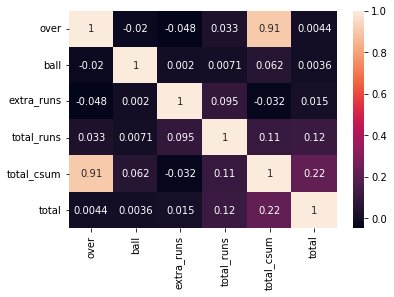

In [ ]:
from seaborn import heatmap
heatmap(data=data.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  data[col] = le.fit_transform(data[col])
data.head()

,batting_team,bowling_team,over,ball,extra_runs,total_runs,total_csum,total
match_id,,,,,,,,
1,10,9,1,1,0,0,0,207
1,10,9,1,2,0,0,0,207
1,10,9,1,3,0,4,4,207
1,10,9,1,4,0,0,4,207
1,10,9,1,5,2,2,6,207


In [ ]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [ ]:
data = np.array(columnTransformer.fit_transform(data))

In [ ]:
data

array(<19654x28 sparse matrix of type '<class 'numpy.float64'>'
	with 130357 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [ ]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad', 'batting_team_Gujarat Lions',
              'batting_team_Deccan Chargers', 'bowling_team_Chennai Super Kings', 
              'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 
              'bowling_team_Rajasthan Royals', 'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 
              'bowling_team_Gujarat Lions', 'bowling_team_Deccan Chargers', 'over', 'ball', 'extra_runs','total_runs', 'total_csum', 'total']
df = pd.DataFrame(data, columns=cols)

ValueError: ignored

In [ ]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,batting_team_Gujarat Lions,bowling_team_Chennai Super Kings,...,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,bowling_team Gujarat Lions,over,ball,extra_runs,total_runs,total_csum,total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,207.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,207.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,3.0,0.0,4.0,4.0,207.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,4.0,0.0,0.0,4.0,207.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,5.0,2.0,2.0,6.0,207.0


In [ ]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [ ]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (13345, 23)
Testing Set : (3337, 23)


In [ ]:
models = dict()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features.values, train_labels.values)

DecisionTreeRegressor()

In [ ]:
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 98.34%
Test Score : 32.02%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 15.073394266307064
Mean Squared Error (MSE): 751.0034566143908
Root Mean Squared Error (RMSE): 27.404442278842144


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [ ]:
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 32.97%
Test Score : 32.05%


In [ ]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 21.13923203581245
Mean Squared Error (MSE): 750.630330004093
Root Mean Squared Error (RMSE): 27.397633657016677


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [ ]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 93.26%
Test Score : 58.68%


In [ ]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.712809529106728
Mean Squared Error (MSE): 456.40318641148525
Root Mean Squared Error (RMSE): 21.363594885025442


In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
# Train Model
lasso.fit(train_features, train_labels)

LassoCV()

In [ ]:
train_score_lasso = str(lasso.score(train_features, train_labels)*100)
test_score_lasso = str(lasso.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')
models["lasso"] = test_score_lasso

Train Score : 32.19%
Test Score : 31.38%


In [ ]:
print("---- Lasso Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, lasso.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, lasso.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, lasso.predict(test_features)))))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 21.150927864217365
Mean Squared Error (MSE): 758.0325378704858
Root Mean Squared Error (RMSE): 27.532390703868884


In [ ]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [ ]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 18.09%
Test Score : 16.70%


In [ ]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 23.408362507753953
Mean Squared Error (MSE): 920.1801156449616
Root Mean Squared Error (RMSE): 30.334470749379516


In [ ]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(activation='logistic', max_iter=500)
# Train Model
neural_net.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(activation='logistic', max_iter=500)

In [ ]:
train_score_neural_net = str(neural_net.score(train_features, train_labels)*100)
test_score_neural_net = str(neural_net.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_neural_net[:5]}%\nTest Score : {test_score_neural_net[:5]}%')
models["neural_net"] = test_score_neural_net 

Train Score : 55.86%
Test Score : 54.64%


In [ ]:
print("---- Neural Networks Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, neural_net.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, neural_net.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, neural_net.predict(test_features)))))

---- Neural Networks Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.01380937071538
Mean Squared Error (MSE): 501.1066068091701
Root Mean Squared Error (RMSE): 22.385410579419133


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


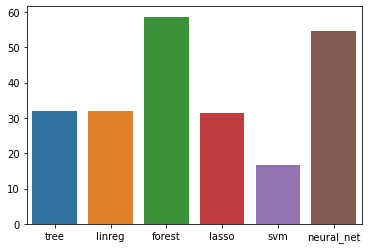

In [ ]:
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)

In [ ]:
import pickle
filename = '/content/drive/My Drive/first-innings-score-model.pkl'
pickle.dump(forest, open(filename, 'wb'))